In [3]:
%pip install mlflow

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [4]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# configuration
sns.set_palette(sns.color_palette("pastel",10))

In [6]:
df_students = pd.read_csv('../datasets/StudentPerformanceFactors.csv')
df_students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df_students.columns = df_students.columns.str.lower()
df_students.columns.to_list()

['hours_studied',
 'attendance',
 'parental_involvement',
 'access_to_resources',
 'extracurricular_activities',
 'sleep_hours',
 'previous_scores',
 'motivation_level',
 'internet_access',
 'tutoring_sessions',
 'family_income',
 'teacher_quality',
 'school_type',
 'peer_influence',
 'physical_activity',
 'learning_disabilities',
 'parental_education_level',
 'distance_from_home',
 'gender',
 'exam_score']

In [8]:
df_students.isnull().sum()
df_students.dropna(inplace=True)
df_students.isnull().sum()

hours_studied                 0
attendance                    0
parental_involvement          0
access_to_resources           0
extracurricular_activities    0
sleep_hours                   0
previous_scores               0
motivation_level              0
internet_access               0
tutoring_sessions             0
family_income                 0
teacher_quality               0
school_type                   0
peer_influence                0
physical_activity             0
learning_disabilities         0
parental_education_level      0
distance_from_home            0
gender                        0
exam_score                    0
dtype: int64

In [9]:
df_students.drop_duplicates(inplace=True)

In [ ]:
df_students.loc[df_students['exam_score'] > 100, 'exam_score'] = 100


/var/folders/z3/4t2djn7x3r12t3j1w8yylsg80000gn/T/ipykernel_15200/3371445463.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_students['exam_score'][df_students['exam_score'] > 100] = 100
/var/folders/z3/4t2djn7x3r12t3j1w8yylsg80000gn/T

In [11]:
columns = df_students.dtypes[df_students.dtypes == 'object'].to_dict().keys()

for column in columns:
    df_students[column] = df_students[column].astype('category')

df_students.dtypes

hours_studied                    int64
attendance                       int64
parental_involvement          category
access_to_resources           category
extracurricular_activities    category
sleep_hours                      int64
previous_scores                  int64
motivation_level              category
internet_access               category
tutoring_sessions                int64
family_income                 category
teacher_quality               category
school_type                   category
peer_influence                category
physical_activity                int64
learning_disabilities         category
parental_education_level      category
distance_from_home            category
gender                        category
exam_score                       int64
dtype: object

### Analyze exploration data

/var/folders/z3/4t2djn7x3r12t3j1w8yylsg80000gn/T/ipykernel_15200/449194610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_school_type = df_students.groupby('school_type').size().reset_index(name='count')


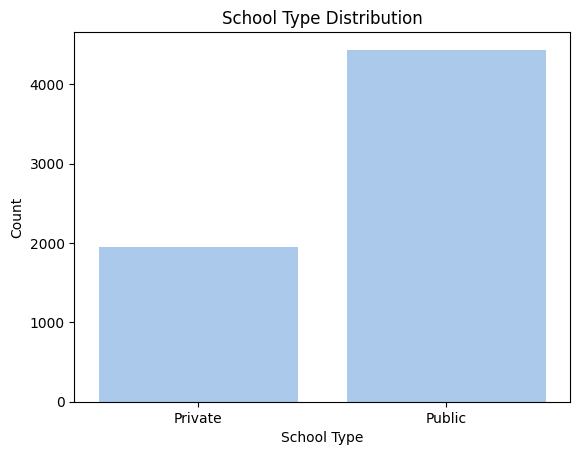

In [12]:
df_school_type = df_students.groupby('school_type').size().reset_index(name='count')

sns.barplot(x='school_type', y='count', data=df_school_type)
plt.xlabel('School Type')
plt.ylabel('Count')
plt.title('School Type Distribution')
plt.show()

/var/folders/z3/4t2djn7x3r12t3j1w8yylsg80000gn/T/ipykernel_15200/1827850160.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_family_income= df_students.groupby('family_income').size().reset_index(name='count')


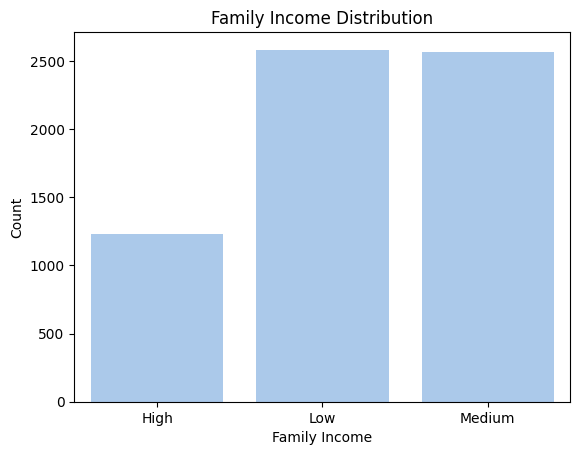

In [13]:
df_family_income= df_students.groupby('family_income').size().reset_index(name='count')

sns.barplot(x='family_income', y='count', data=df_family_income)
plt.xlabel('Family Income')
plt.ylabel('Count')
plt.title('Family Income Distribution')
plt.show()

/var/folders/z3/4t2djn7x3r12t3j1w8yylsg80000gn/T/ipykernel_15200/489688073.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_teacher_quality = df_students.groupby('teacher_quality').size().reset_index(name='count')


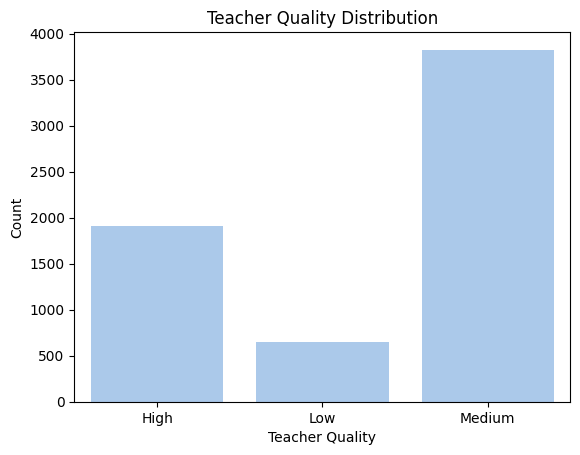

In [14]:
df_teacher_quality = df_students.groupby('teacher_quality').size().reset_index(name='count')

sns.barplot(x='teacher_quality', y='count', data=df_teacher_quality)
plt.xlabel('Teacher Quality')
plt.ylabel('Count')
plt.title('Teacher Quality Distribution')
plt.show()

/var/folders/z3/4t2djn7x3r12t3j1w8yylsg80000gn/T/ipykernel_15200/2225839963.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_motivation = df_students.groupby('motivation_level').size().reset_index(name='count')


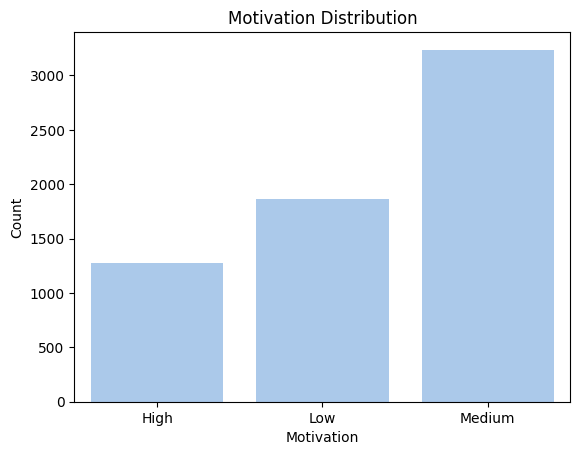

In [15]:
df_motivation = df_students.groupby('motivation_level').size().reset_index(name='count')

sns.barplot(x='motivation_level', y='count', data=df_motivation)
plt.xlabel('Motivation')
plt.ylabel('Count')
plt.title('Motivation Distribution')
plt.show()

In [ ]:
columns = ['school_type', 'family_income', 'teacher_quality', 'motivation_level']   

